In [2]:
import pandas as pd
import numpy as np
from detect_peaks import detect_peaks , _plot


In [3]:
data = pd.read_csv("data.csv" , index_col=False, header=0)

In [4]:
depth_data = data.ix[:,0:2]

/home/shikhar/Documents/vij/env/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


In [5]:
tension_data = data.ix[:,5:7]
depth_data['tension'] = tension_data['Tension(Y)']
depth_data['Depth(Y)'] = (np.ceil(depth_data["Depth(Y)"]/10)*10).astype(int)

/home/shikhar/Documents/vij/env/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/shikhar/Documents/vij/env/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
depth_data['block'] = (depth_data["Depth(Y)"].shift(1) != depth_data["Depth(Y)"]).astype(int).cumsum()

/home/shikhar/Documents/vij/env/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [7]:
l = depth_data.reset_index().groupby(["Depth(Y)","block"]) # Finding ranges where depth is constant

In [8]:
filtered_depth_indices = list(filter(lambda x : len(l.indices[x]) > 30 , l.indices))

In [9]:
sorted_depth_indices = sorted(filtered_depth_indices , key = lambda x : len(l.indices[x]) , reverse = True)

In [10]:
def tensions():
    l = []
    for e in sorted_depth_indices:
        m,n = e
        t = np.where((depth_data["Depth(Y)"] == m) & (depth_data['block'] == n) )
        l.extend(t[0])
    return l

In [11]:
t = tensions()
len(t)

6870

In [12]:
data = []
for e in range(len(depth_data)):
    val = 0
    if e in t:
        val = depth_data['tension'][e]
    data.append(val)

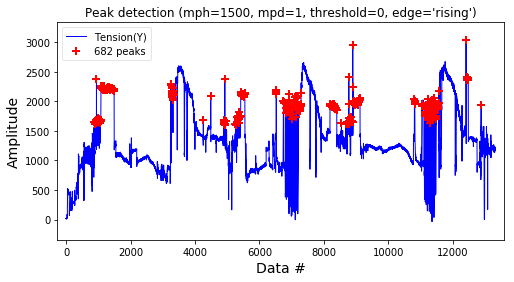

In [13]:
id = detect_peaks(data , mph = 1600)

_plot(tension_data['Tension(Y)'] ,1500 , mpd = 1 , threshold = 0,edge = "rising" , valley = False , ax = None ,ind =  id )